<a href="https://colab.research.google.com/github/ngcheeyuan/Learner-s-Repo-for-Tensorflow/blob/main/03_tensorflow_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference:
https://github.com/mrdbourke/tensorflow-deep-learning


#Intro to CNN and Computer vision with Tensorflow

Computer vision is the practice of writing algorithmns wihich can discover patterns in visual data

### Get the Data

Datasource:
https://www.kaggle.com/dansbecker/food-101

We start with a smaller dataset so we can experiment quickly and figure out what works and what doesn't work, before scaling up

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-01-11 06:15:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.128, 209.85.146.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   166MB/s    in 0.6s    

2022-01-11 06:15:04 (166 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Insepect the data

And for a computer visiion project , this means to visualize many samples of your data

In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os
# walk through pizza_steak directiory and list number of files

for dirpath,dirnames,filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 0 directories and 250 images in pizza_steak/test/steak.
There are 2 directories and 0 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/pizza.
There are 0 directories and 750 images in pizza_steak/train/steak.


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jan 11 06:13 .
drwxr-xr-x 1 root root 4096 Jan 11 06:15 ..
drwxr-xr-x 4 root root 4096 Jan 11 06:13 test
drwxr-xr-x 4 root root 4096 Jan 11 06:13 train


In [ ]:
#Another way to find out find out how many images are in a file

num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

To visuaize our images , first let's get the class names programmatically

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
#let's visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #setup the target directory
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  # read in the image and plot it using matplotlib
  img =mpimg.imread(target_folder+"/"+random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');
  print(f'image shape: {img.shape}') 

  return img

['625687.jpg']
image shape: (512, 512, 3)


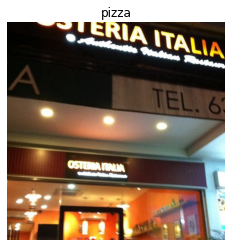

In [ ]:
#view a random image from the training dataset

img = view_random_image(target_dir = 'pizza_steak/train/' , 
                        target_class = 'pizza')

['1327567.jpg']
image shape: (382, 512, 3)


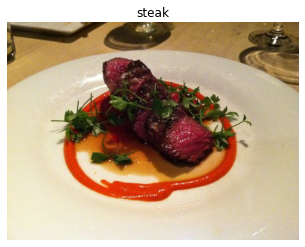

In [ ]:
img = view_random_image(target_dir = 'pizza_steak/train/' , 
                        target_class = 'steak')

In [ ]:
import tensorflow as tf
tf.constant(img) , img.dtype

(<tf.Tensor: shape=(382, 512, 3), dtype=uint8, numpy=
 array([[[158, 139,  99],
         [123, 104,  64],
         [128, 108,  71],
         ...,
         [105,  73,  34],
         [103,  71,  32],
         [104,  72,  33]],
 
        [[173, 151, 112],
         [140, 121,  81],
         [134, 114,  77],
         ...,
         [109,  77,  38],
         [107,  75,  36],
         [109,  77,  36]],
 
        [[176, 157, 117],
         [157, 138,  98],
         [142, 122,  85],
         ...,
         [112,  80,  39],
         [112,  80,  39],
         [114,  82,  41]],
 
        ...,
 
        [[236, 230, 196],
         [239, 233, 199],
         [241, 235, 203],
         ...,
         [198, 187, 165],
         [198, 187, 167],
         [199, 188, 168]],
 
        [[236, 230, 196],
         [238, 232, 198],
         [239, 233, 199],
         ...,
         [197, 187, 162],
         [197, 186, 164],
         [199, 188, 166]],
 
        [[236, 230, 194],
         [238, 232, 196],
         [238,

In [ ]:
#View the image shape
img.shape # returns width, height, colour channels

(382, 512, 3)

In [ ]:
# Get all the pixel values between 0 & 1


# An end to end example

Let's build a CNN to find patterns in our images, more specifically we need a way to

*load our images

*preprocess our iamges

*building a CNN to find patterns in our images

*compile our CNN

*fit the CNN to our training data

In [ ]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-62f0663c-9a85-a657-f7ad-5af4d935b7cb)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
#preprocess data
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#setup path to our data directories
train_dir = '/content/pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               seed = 42
                                               )
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               seed = 42
                                               )

#Build a CNN model - based on Tiny VGG
model_1 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters = 10,
                                                             kernel_size = 3,
                                                             activation = 'relu',
                                                             input_shape = (224,224,3)),
                                      tf.keras.layers.Conv2D(10,3, activation = 'relu'),
                                      tf.keras.layers.MaxPool2D(pool_size = 2,
                                                                padding = 'valid'),
                                      tf.keras.layers.Conv2D(10,3,activation = 'relu'),
                                      tf.keras.layers.Conv2D(10,3,activation = 'relu'),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1,activation = 'sigmoid')
                                      
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy']
                )
#Fit the model

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data), # 1 step per each batch
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 259ms/step - loss: 0.5672 - accuracy: 0.7027 - val_loss: 0.3960 - val_accuracy: 0.8420
Epoch 2/5
47/47 [==============================] - 11s 236ms/step - loss: 0.4104 - accuracy: 0.8113 - val_loss: 0.3306 - val_accuracy: 0.8700
Epoch 3/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4091 - accuracy: 0.8173 - val_loss: 0.3523 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 11s 235ms/step - loss: 0.3600 - accuracy: 0.8480 - val_loss: 0.3210 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 12s 247ms/step - loss: 0.3335 - accuracy: 0.8653 - val_loss: 0.3238 - val_accuracy: 0.8660


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (224,224,3)),
                               tf.keras.layers.Dense(4,activation = 'relu'),
                               tf.keras.layers.Dense(4,activation = 'relu'),
                               tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 216ms/step - loss: 1.3614 - accuracy: 0.5227 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (224,224,3)),
                               tf.keras.layers.Dense(100, activation = 'relu'),
                               tf.keras.layers.Dense(100, activation = 'relu'),
                               tf.keras.layers.Dense(100, activation = 'relu'),
                               tf.keras.layers.Dense(1, activation = 'sigmoid'),
                               
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 222ms/step - loss: 3.8575 - accuracy: 0.6420 - val_loss: 0.5068 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 10s 214ms/step - loss: 0.8154 - accuracy: 0.6987 - val_loss: 0.6448 - val_accuracy: 0.6840
Epoch 3/5
47/47 [==============================] - 10s 211ms/step - loss: 0.6231 - accuracy: 0.7280 - val_loss: 0.4459 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.5011 - accuracy: 0.7807 - val_loss: 0.6966 - val_accuracy: 0.7020
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6189 - accuracy: 0.7427 - val_loss: 0.6592 - val_accuracy: 0.7260


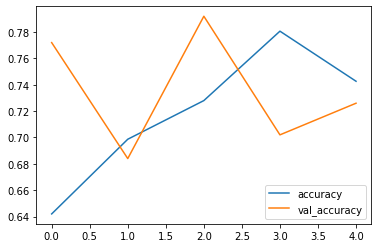

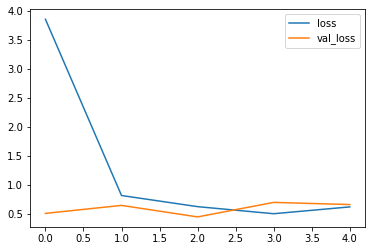

In [ ]:
pd.DataFrame(history_3.history)[['accuracy','val_accuracy']].plot()
pd.DataFrame(history_3.history)[['loss','val_loss']].plot()

### Binary classification breakdown:
1. Understand your data (visualize)
2. Preprocess - data preparation
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjustment different parameters and improve the model
7. Repeat until satisfied

1. Understanding your data

['444709.jpg']
image shape: (512, 512, 3)
['82578.jpg']
image shape: (384, 512, 3)


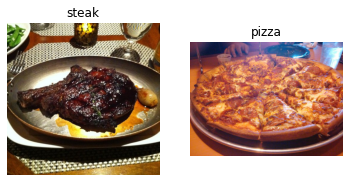

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/','pizza')

2. Preprocess the data(prepare for the a model)

In [ ]:
#Definte directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Turn our data into batches - a batch is a small subset of data.
Reasons:
1. images might not be unable to fit into memory
2.Trying to learn the patterns in all the images in one go, could resut in the model not being able to learn very well.

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)


#load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory  = train_dir,  # target training directory
                                            target_size = (224,224), #target size of images
                                            class_mode = 'binary', # type of data you're working with
                                            batch_size = 32) #


test_data = test_datagen.flow_from_directory(directory  = test_dir,
                                            target_size = (224,224),
                                            class_mode = 'binary',
                                            batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Get a sample of a train data batch
images, labels = train_data.next()#get the 'next' batch of images/labels in train data
len(images),len(labels)

(32, 32)

In [ ]:
len(train_data) , 1500/32

(47, 46.875)

In [ ]:
images[:2], images[0].shape

(array([[[[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         [[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         [[0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098],
          ...,
          [0.01568628, 0.01568628, 0.02352941],
          [0.01568628, 0.01568628, 0.02352941],
          [0.01960784, 0.01960784, 0.02745098]],
 
         ...,
 
         [[0.6392157 , 0.6       , 0.6039216 ],
          [0.62745

In [ ]:
images[7]

array([[[0.882353  , 0.43137258, 0.1764706 ],
        [0.8980393 , 0.6       , 0.29411766],
        [0.9960785 , 0.8745099 , 0.50980395],
        ...,
        [0.86666673, 0.73333335, 0.48235297],
        [0.80392164, 0.6666667 , 0.44705886],
        [0.87843144, 0.7490196 , 0.5411765 ]],

       [[0.9803922 , 0.5372549 , 0.2784314 ],
        [0.909804  , 0.62352943, 0.3137255 ],
        [0.9921569 , 0.87843144, 0.50980395],
        ...,
        [0.6745098 , 0.5411765 , 0.2901961 ],
        [0.67058825, 0.54509807, 0.3137255 ],
        [0.75294125, 0.6313726 , 0.40784317]],

       [[0.96470594, 0.5372549 , 0.27450982],
        [1.        , 0.73333335, 0.4156863 ],
        [0.9843138 , 0.8862746 , 0.52156866],
        ...,
        [0.7019608 , 0.5803922 , 0.3254902 ],
        [0.6745098 , 0.5568628 , 0.3137255 ],
        [0.7372549 , 0.62352943, 0.38823533]],

       ...,

       [[0.8980393 , 0.5686275 , 0.22352943],
        [0.7490196 , 0.40784317, 0.09803922],
        [0.80392164, 0

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
#view the first batch of labels
labels

array([1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.],
      dtype=float32)

A baseline is a relatively simple model or existing result that you setup when beginning your experiment

One of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (look at which current model is performing best in the field for your problem)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential 

model_4 = Sequential([Conv2D(filters = 10, # number of sliding windows going across an input ( high = more complex model)
                            kernel_size = (3,3), # the size of the sliding window going across an input
                            strides = (1,1), # the size of the step the sliding window takes across an input
                            padding = 'valid', # if 'same , output shape is same as input shape, if 'valid' output shape gets compressed
                            activation = 'relu', 
                            input_shape = (224,224,3)), #input layer
                      Conv2D(filters = 10,
                             kernel_size = 3,
                             activation = 'relu'),
                      Conv2D(10,3, activation = 'relu'),
                      Flatten(),
                      Dense(1,activation = 'sigmoid') #output layer           
])

model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 253ms/step - loss: 0.6048 - accuracy: 0.7007 - val_loss: 0.8485 - val_accuracy: 0.6020
Epoch 2/5
47/47 [==============================] - 12s 244ms/step - loss: 0.3851 - accuracy: 0.8320 - val_loss: 0.3915 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 12s 244ms/step - loss: 0.2829 - accuracy: 0.8953 - val_loss: 0.3727 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 12s 244ms/step - loss: 0.1629 - accuracy: 0.9567 - val_loss: 0.3611 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 12s 245ms/step - loss: 0.0789 - accuracy: 0.9840 - val_loss: 0.4509 - val_accuracy: 0.7800


In [ ]:
model_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_20 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_21 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_7 (Flatten)         (None, 475240)            0         
                                                                 
 dense_12 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 163ms/step - loss: 0.3238 - accuracy: 0.8660


[0.3238142132759094, 0.8659999966621399]

In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 3s 163ms/step - loss: 0.4509 - accuracy: 0.7800


[0.4508815109729767, 0.7799999713897705]

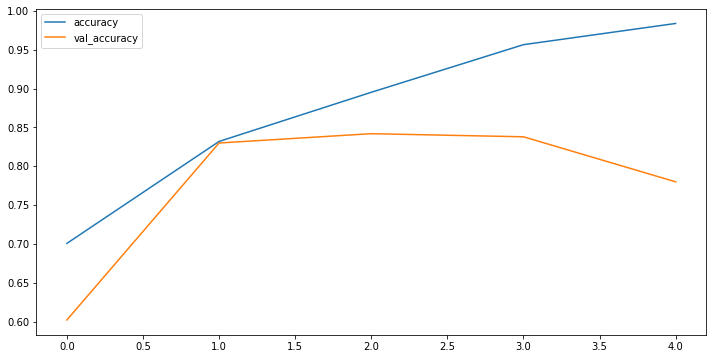

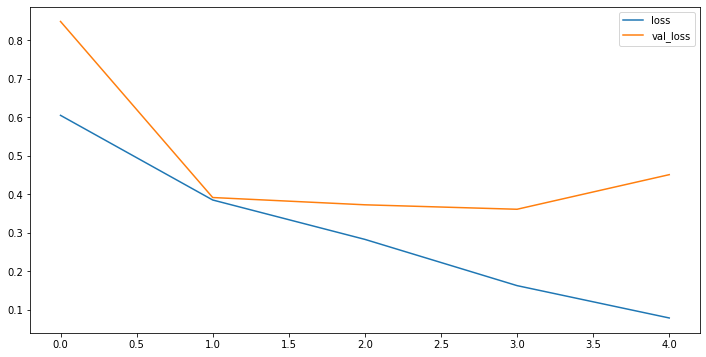

In [ ]:
import pandas as pd

pd.DataFrame(history_4.history)[['accuracy','val_accuracy']].plot(figsize=(12,6))
pd.DataFrame(history_4.history)[['loss','val_loss']].plot(figsize=(12,6))

In [ ]:
def plot_loss_curves(history):
  '''
  return sepearate curves for training and validation metrics.
  '''

  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #plot loss
  plt.figure(figsize = (16,9))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss , label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()
  #plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

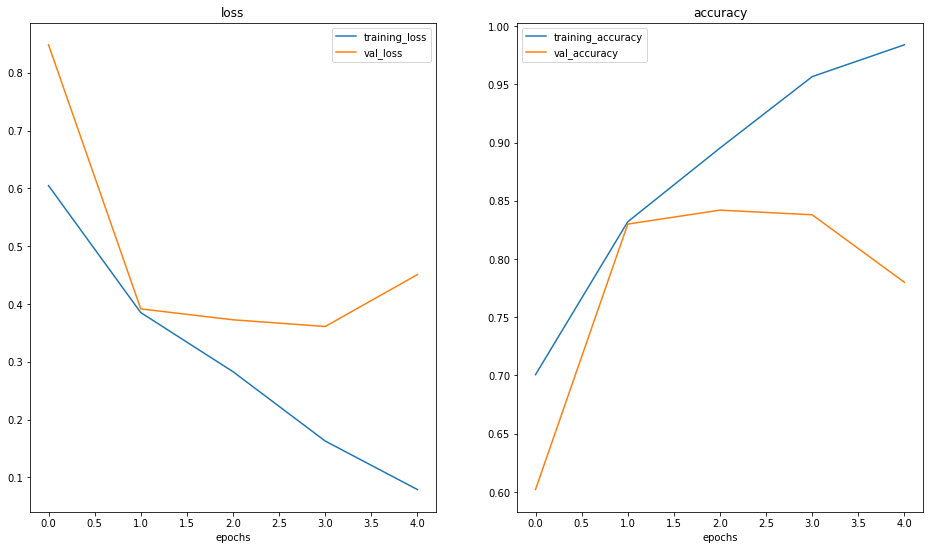

In [ ]:
plot_loss_curves(history_4)

W:hen a model's validation loss starts to increase , it's likely that the model is overfitting the training set. This means, it's learning the patterns in the training dataset too well, and thus the ability to generalise on unseen data will be diminished

##6. Adjust the model parameters

0. Create a baseline
1. Beat the baseline to reduce bias a larger model
2. Reduce overfitting

Ways to reduce bias
* increase the number of conv layers
* increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting

*Add data augmentation

*Add regularization layers (such as MaxPool2D)

In [ ]:
# Create the model (this is going to be our new baseline)

model_5 = Sequential([Conv2D(10,3,activation='relu', input_shape = (224,224,3)),
                      MaxPool2D(pool_size = 2), # down sampling the input representation by taking the maximum vaue over the window defined pool size for each dimension along the feature axis
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(),
                      Conv2D(10,3,activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1,activation = 'sigmoid')
                      
])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 236ms/step - loss: 0.6676 - accuracy: 0.5780 - val_loss: 0.5411 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 11s 229ms/step - loss: 0.4929 - accuracy: 0.7567 - val_loss: 0.3715 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 11s 229ms/step - loss: 0.4301 - accuracy: 0.7980 - val_loss: 0.3455 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 11s 229ms/step - loss: 0.3976 - accuracy: 0.8340 - val_loss: 0.3271 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 11s 228ms/step - loss: 0.3943 - accuracy: 0.8220 - val_loss: 0.3532 - val_accuracy: 0.8660


In [ ]:
model_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_27 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 10)      

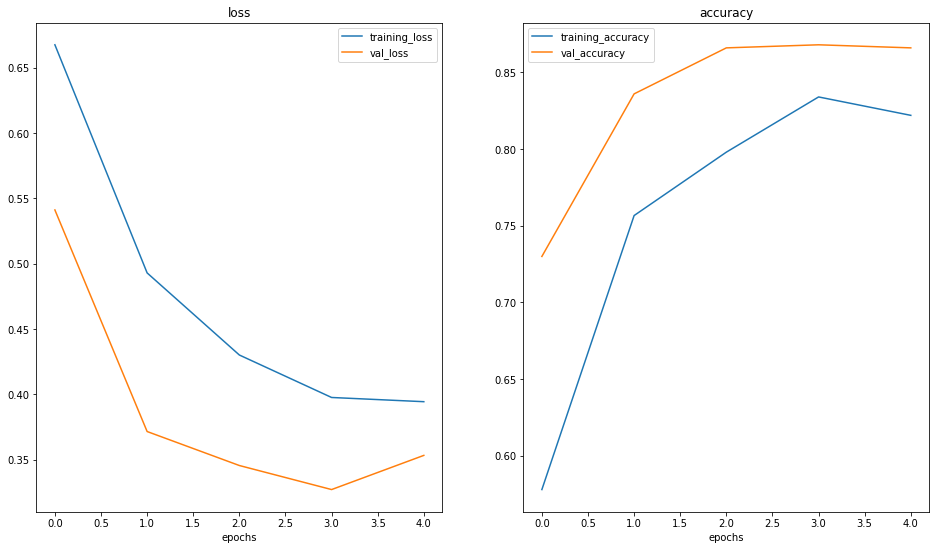

In [ ]:
plot_loss_curves(history_5)

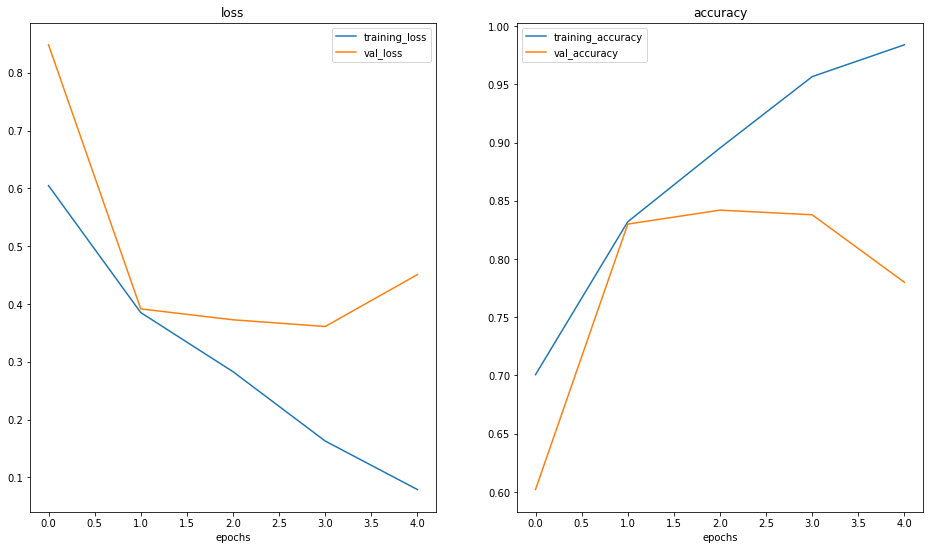

In [ ]:
plot_loss_curves(history_4)

In [ ]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2, 
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.3, 
                                             horizontal_flip = True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)
# Create ImageDataGenerator without data augmentation
test_datagen = ImageDataGenerator(rescale = 1/255.)

>What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adusting the rotation of an image, flipping it, cropping it or something similar.

In [ ]:
# import data and augment it from training directory
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size = (224,224),
                                                                      batch_size = 32,
                                                                      class_mode = 'binary',
                                                                      shuffle = False) # for demonstration purpose only

# create non augmented data
print('non-augmented train data')
train_data = train_datagen.flow_from_directory(train_dir,
                                                     target_size = (224,224),
                                                     batch_size = 32,
                                                     class_mode = 'binary',
                                                     shuffle = False)
print('non-augmented test data')
test_data = test_datagen.flow_from_directory(test_dir,
                                                target_size = (224,224),
                                                batch_size = 32 ,
                                                class_mode = 'binary',
                                                )



Augmented training data
Found 1500 images belonging to 2 classes.
non-augmented train data
Found 1500 images belonging to 2 classes.
non-augmented test data
Found 500 images belonging to 2 classes.


Data augmentation is usually done only on the training data

Augmentation only occur when it's loaded in.

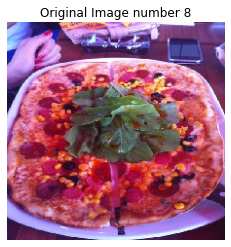

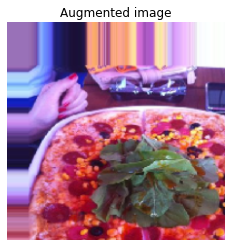

In [ ]:
# Get sample data batches
images,labels = train_data.next()
augmented_images ,augmented_labels = train_data_augmented.next()
#show original image and augmented image

import random
random_number = random.randint(0,32)
plt.imshow(images[random_number])
plt.title(f'Original Image number {random_number}')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented image')
plt.axis(False);

In [ ]:
model_6 = Sequential([Conv2D(filters = 10,
                             kernel_size = 3,
                             strides = (1,1),
                             padding = 'valid',
                             activation = 'relu',
                             input_shape = (224,224,3)
                             ),
                      MaxPool2D(pool_size = 2),
                      Conv2D(10,3, activation = 'relu'),
                      MaxPool2D(),
                      Conv2D(10,3, activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1,activation = 'sigmoid')
])

model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 501ms/step - loss: 0.7094 - accuracy: 0.4900 - val_loss: 0.6863 - val_accuracy: 0.5080
Epoch 2/5
47/47 [==============================] - 23s 495ms/step - loss: 0.6965 - accuracy: 0.5293 - val_loss: 0.6723 - val_accuracy: 0.5860
Epoch 3/5
47/47 [==============================] - 23s 495ms/step - loss: 0.6937 - accuracy: 0.5020 - val_loss: 0.6623 - val_accuracy: 0.5660
Epoch 4/5
47/47 [==============================] - 23s 498ms/step - loss: 0.6949 - accuracy: 0.4547 - val_loss: 0.6570 - val_accuracy: 0.6180
Epoch 5/5
47/47 [==============================] - 23s 498ms/step - loss: 0.6689 - accuracy: 0.5933 - val_loss: 0.5607 - val_accuracy: 0.7740


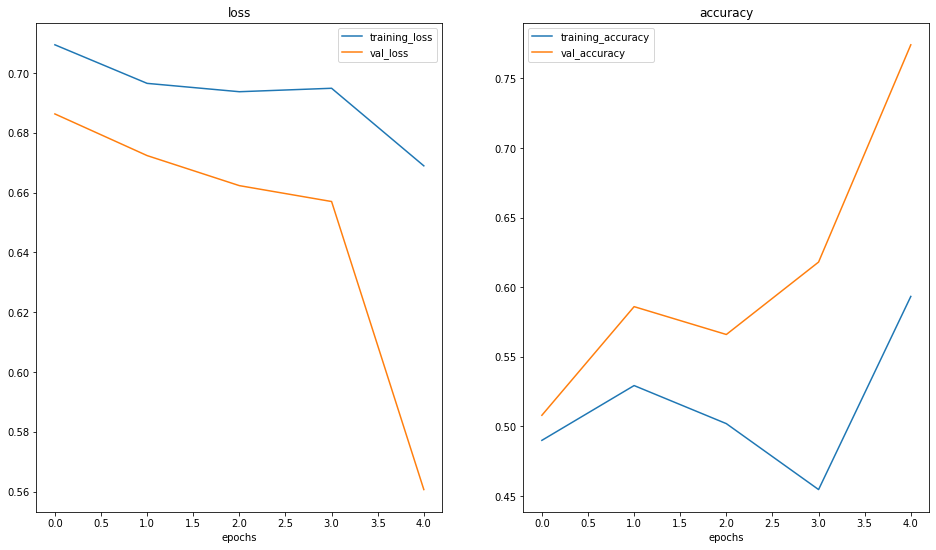

In [ ]:
plot_loss_curves(history_6)

In [ ]:
# import data and augment it from training directory
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size = (224,224),
                                                                      batch_size = 32,
                                                                      class_mode = 'binary',
                                                                      shuffle = True) 

# create non augmented data
print('non-augmented train data')
train_data = train_datagen.flow_from_directory(train_dir,
                                                     target_size = (224,224),
                                                     batch_size = 32,
                                                     class_mode = 'binary',
                                                     shuffle = True)
print('non-augmented test data')
test_data = test_datagen.flow_from_directory(test_dir,
                                                target_size = (224,224),
                                                batch_size = 32 ,
                                                class_mode = 'binary',
                                                )



Augmented training data
Found 1500 images belonging to 2 classes.
non-augmented train data
Found 1500 images belonging to 2 classes.
non-augmented test data
Found 500 images belonging to 2 classes.


Let's shuffle our augmeted training data and train another model on it and see what happens.

In [ ]:
model_7 = Sequential([Conv2D(filters = 10,
                             kernel_size = 3,
                             strides = (1,1),
                             padding = 'valid',
                             activation = 'relu',
                             input_shape = (224,224,3)
                             ),
                      MaxPool2D(pool_size = 2),
                      Conv2D(10,3, activation = 'relu'),
                      MaxPool2D(),
                      Conv2D(10,3, activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1,activation = 'sigmoid')
])

model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_7 = model_7.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 548ms/step - loss: 0.6481 - accuracy: 0.6267 - val_loss: 0.5134 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 26s 561ms/step - loss: 0.5618 - accuracy: 0.7167 - val_loss: 0.4175 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 26s 553ms/step - loss: 0.5293 - accuracy: 0.7407 - val_loss: 0.3819 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 25s 534ms/step - loss: 0.5122 - accuracy: 0.7673 - val_loss: 0.4216 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 24s 520ms/step - loss: 0.4842 - accuracy: 0.7600 - val_loss: 0.3664 - val_accuracy: 0.8620


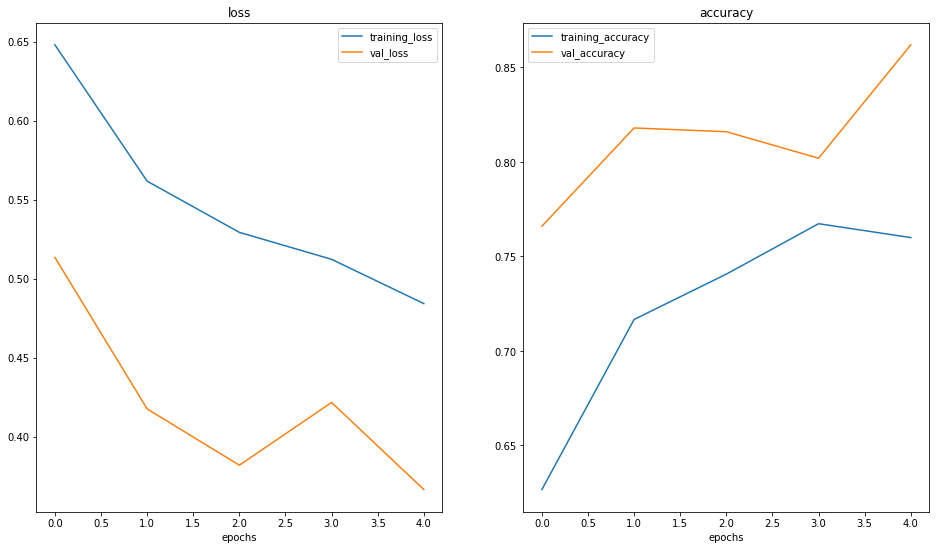

In [ ]:
plot_loss_curves(history_7)

When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn across a wide array of images

In [ ]:
### 7 Repeat until satisfied

In [ ]:
model_8 = Sequential([Conv2D(filters = 10,
                             kernel_size = 3,
                             strides = (1,1),
                             padding = 'valid',
                             activation = 'relu',
                             input_shape = (224,224,3)
                             ),
                      MaxPool2D(pool_size = 2),
                      Conv2D(10,3, activation = 'relu'),
                      MaxPool2D(),
                      Conv2D(10,3, activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1,activation = 'sigmoid')
])

model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_8 = model_8.fit(train_data_augmented,
                        epochs = 10,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 26s 529ms/step - loss: 0.6853 - accuracy: 0.5513 - val_loss: 0.6074 - val_accuracy: 0.6560
Epoch 2/10
47/47 [==============================] - 24s 521ms/step - loss: 0.6031 - accuracy: 0.6767 - val_loss: 0.5057 - val_accuracy: 0.7680
Epoch 3/10
47/47 [==============================] - 24s 511ms/step - loss: 0.5541 - accuracy: 0.7247 - val_loss: 0.4808 - val_accuracy: 0.7500
Epoch 4/10
47/47 [==============================] - 24s 511ms/step - loss: 0.5217 - accuracy: 0.7360 - val_loss: 0.4195 - val_accuracy: 0.7940
Epoch 5/10
47/47 [==============================] - 24s 516ms/step - loss: 0.5207 - accuracy: 0.7447 - val_loss: 0.3917 - val_accuracy: 0.8540
Epoch 6/10
47/47 [==============================] - 24s 510ms/step - loss: 0.4898 - accuracy: 0.7787 - val_loss: 0.3575 - val_accuracy: 0.8500
Epoch 7/10
47/47 [==============================] - 24s 516ms/step - loss: 0.4762 - accuracy: 0.7713 - val_loss: 0.3380 - val_accuracy: 0.8680

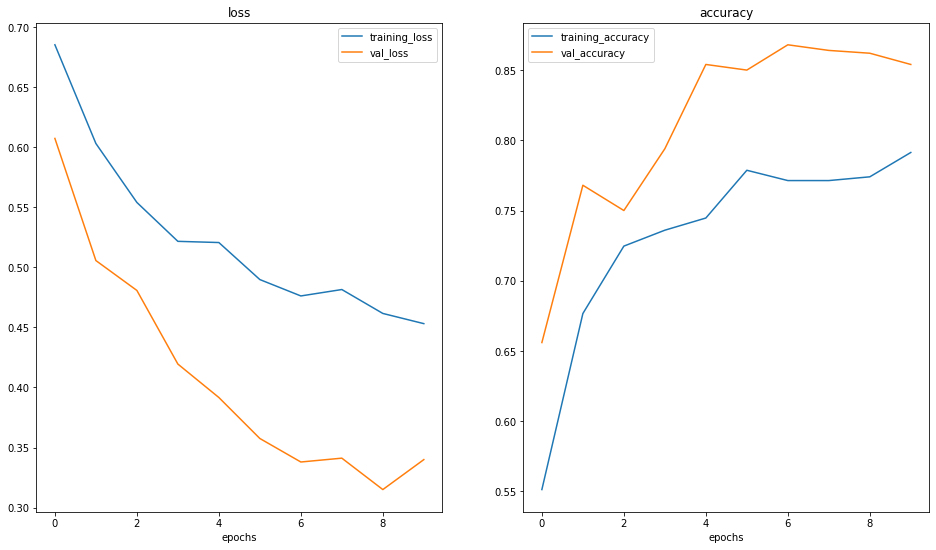

In [ ]:
plot_loss_curves(history_8)

In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')
steak

--2022-01-11 08:59:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.8’

03-steak.jpeg.8     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-01-11 08:59:52 (34.0 MB/s) - ‘03-steak.jpeg.8’ saved [1978213/1978213]



array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

When you train a neural network and you want to make a prediction on it. It's important that the new data is preprocessed into the same format as the data your model was trained on

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pizza = mpimg.imread('03-pizza-dad.jpeg')
pizza

--2022-01-11 09:01:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2022-01-11 09:01:04 (41.4 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



array([[[154, 171, 117],
        [175, 189, 138],
        [181, 193, 145],
        ...,
        [ 21,  22,  17],
        [ 18,  19,  14],
        [ 14,  15,  10]],

       [[146, 163, 109],
        [167, 181, 130],
        [180, 194, 145],
        ...,
        [ 21,  22,  17],
        [ 18,  19,  14],
        [ 15,  16,  11]],

       [[124, 141,  87],
        [146, 163, 111],
        [171, 185, 136],
        ...,
        [ 18,  19,  14],
        [ 17,  18,  13],
        [ 15,  16,  11]],

       ...,

       [[ 72,  55,  35],
        [ 59,  42,  22],
        [ 45,  28,   8],
        ...,
        [152, 106,  54],
        [150, 104,  52],
        [148, 102,  50]],

       [[ 64,  47,  27],
        [ 55,  38,  18],
        [ 41,  24,   4],
        ...,
        [150, 108,  50],
        [147, 105,  47],
        [144, 102,  44]],

       [[ 64,  47,  27],
        [ 60,  43,  23],
        [ 46,  29,   9],
        ...,
        [149, 107,  49],
        [146, 104,  46],
        [143, 101,  43]]

In [ ]:
#Create a function to and resize it to be able to be used with model:

def load_and_prep_image(filename,img_shape=224):
  '''
  Read an image from filename, turns it into a tensor and reshape it 
  to (img_shape,img_shape,colour_channels)
  '''
  #Read in the image
  img = tf.io.read_file(filename)
  #Decode the readfile into a tensor
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size = [img_shape,img_shape])
  #rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

  #found in documentation

In [ ]:
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
#We can index the predicted class by rounding the prediction probability 

'steak'

In [ ]:
def pred_and_plot(model,filename,class_names = class_names):
  '''
  Imports an image located at filename , make a prediction with model and 
  plot the image with the predicted class as the title
  '''

  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img,axis=0))

  if len(pred[0])>1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False);

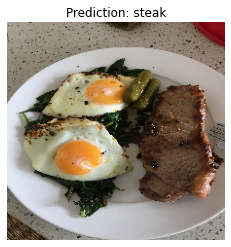

In [ ]:
pred_and_plot(model = model_8,
              filename = '03-steak.jpeg',
              class_names = class_names)

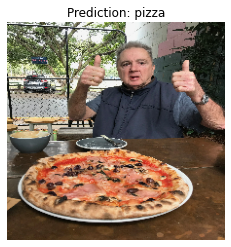

In [ ]:
pred_and_plot(model = model_8,
              filename = '03-pizza-dad.jpeg',
              class_names = class_names)

## multi-class image classification
1. Understand the data
2. Preprocess the data
3. Create a model 
4. Fit the model
5. Evaluate the model
6. Adjust different hyperparameters and improve the model
7. Repeat until satisfied

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-01-11 09:21:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.146.128, 209.85.147.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.146.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   225MB/s    in 2.2s    

2022-01-11 09:21:09 (225 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
!ls 10_food_classes_all_data/train/chicken_curry

1004867.jpg  1637054.jpg  2178253.jpg  2758467.jpg  3379335.jpg  476423.jpg
1014843.jpg  1638863.jpg  217926.jpg   2763485.jpg  3381419.jpg  476425.jpg
1022681.jpg  1643369.jpg  2179606.jpg  2770545.jpg  3391056.jpg  480452.jpg
1027623.jpg  1646416.jpg  2191925.jpg  2775937.jpg  3395013.jpg  483457.jpg
102896.jpg   1651201.jpg  2196716.jpg  2777542.jpg  3395518.jpg  49399.jpg
1040283.jpg  1656470.jpg  2199261.jpg  2781370.jpg  340050.jpg	 504931.jpg
104874.jpg   1667708.jpg  220003.jpg   2786996.jpg  340232.jpg	 505405.jpg
1051025.jpg  1670453.jpg  2200462.jpg  2790493.jpg  3402952.jpg  508075.jpg
105113.jpg   1676206.jpg  2202573.jpg  2798660.jpg  3405370.jpg  50866.jpg
1052361.jpg  1677650.jpg  2208444.jpg  280714.jpg   3408176.jpg  514844.jpg
1065322.jpg  1683965.jpg  221895.jpg   2807390.jpg  341407.jpg	 517965.jpg
1067426.jpg  1685950.jpg  2233325.jpg  2810053.jpg  3419930.jpg  522474.jpg
1068592.jpg  1686313.jpg  2234972.jpg  2811494.jpg  3421060.jpg  523331.jpg
1071242.jpg  1695

In [ ]:
import os
# walk through pizza_steak directiory and list number of files

for dirpath,dirnames,filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/test.
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi.
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings.
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream.
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen.
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry.
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak.
There are 10 directories and 0 ima

In [ ]:
#Setup the train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['852474.jpg']
image shape: (512, 512, 3)


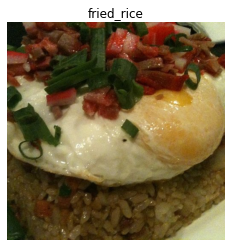

In [ ]:
#Visualize
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)


#load in our image from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = 'categorical',
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode = 'categorical',
                                             batch_size = 32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
#Create the model

model_10 = Sequential([Conv2D(10,3,input_shape = (224,224,3), activation = 'relu'),
                       Conv2D(10,3, activation = 'relu'),
                       MaxPool2D(),
                       Conv2D(10,3, activation = 'relu'),
                       Conv2D(10,3, activation = 'relu'),
                       MaxPool2D(),
                       Flatten(),
                       Dense(10,activation = 'softmax'),
                       
])
model_10.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = Adam(),
                 metrics = ['accuracy'])

history = model_10.fit(train_data,
                       epochs = 5,
                       steps_per_epoch = len(train_data),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 112s 477ms/step - loss: 2.1193 - accuracy: 0.2236 - val_loss: 1.9831 - val_accuracy: 0.3016
Epoch 2/5
235/235 [==============================] - 55s 234ms/step - loss: 1.8697 - accuracy: 0.3500 - val_loss: 1.8894 - val_accuracy: 0.3504
Epoch 3/5
235/235 [==============================] - 55s 235ms/step - loss: 1.4129 - accuracy: 0.5303 - val_loss: 2.0268 - val_accuracy: 0.3276
Epoch 4/5
235/235 [==============================] - 58s 249ms/step - loss: 0.7542 - accuracy: 0.7521 - val_loss: 2.7302 - val_accuracy: 0.2952
Epoch 5/5
235/235 [==============================] - 55s 233ms/step - loss: 0.2684 - accuracy: 0.9207 - val_loss: 4.0641 - val_accuracy: 0.2792


In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 159ms/step - loss: 4.0641 - accuracy: 0.2792


[4.064118385314941, 0.2791999876499176]

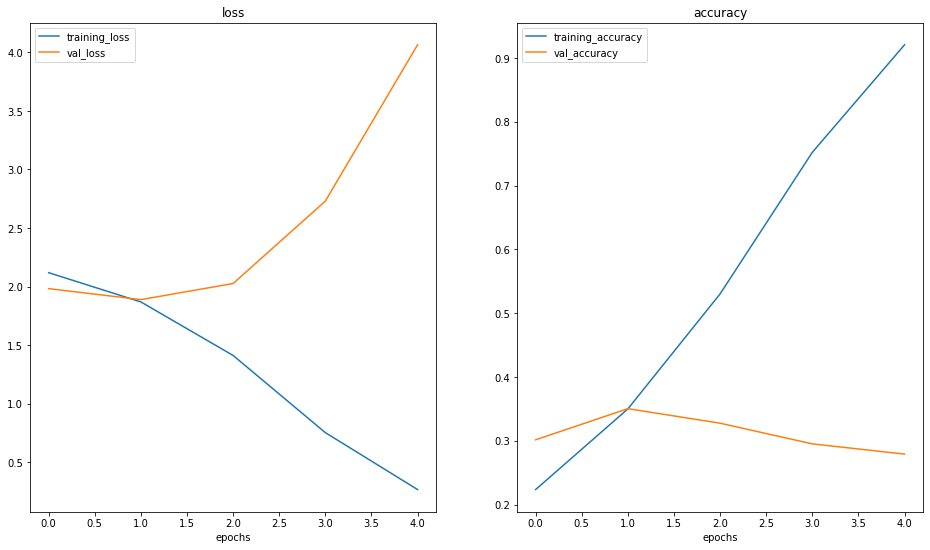

In [ ]:
plot_loss_curves(history)

model is not generalizing well. - overfitted.

how to reduce it?
*Get more data,

*Simplify the model,

*regularize

*use data augmentation

*use transfer learning

In [ ]:
model_11 = Sequential([Conv2D(10,3,input_shape = (224,224,3), activation = 'relu'),
                       MaxPool2D(),
                       Conv2D(10,3, activation = 'relu'),
                       MaxPool2D(),
                       Flatten(),
                       Dense(10,activation = 'softmax'),
                       
])
model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = Adam(),
                 metrics = ['accuracy'])

history = model_10.fit(train_data,
                       epochs = 5,
                       steps_per_epoch = len(train_data),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 56s 237ms/step - loss: 0.0869 - accuracy: 0.9753 - val_loss: 5.2917 - val_accuracy: 0.2672
Epoch 2/5
235/235 [==============================] - 55s 235ms/step - loss: 0.0466 - accuracy: 0.9873 - val_loss: 6.2284 - val_accuracy: 0.2684
Epoch 3/5
235/235 [==============================] - 55s 235ms/step - loss: 0.0646 - accuracy: 0.9796 - val_loss: 6.4069 - val_accuracy: 0.2708
Epoch 4/5
235/235 [==============================] - 56s 237ms/step - loss: 0.0525 - accuracy: 0.9844 - val_loss: 7.0350 - val_accuracy: 0.2672
Epoch 5/5
235/235 [==============================] - 55s 234ms/step - loss: 0.0320 - accuracy: 0.9912 - val_loss: 7.8633 - val_accuracy: 0.2628


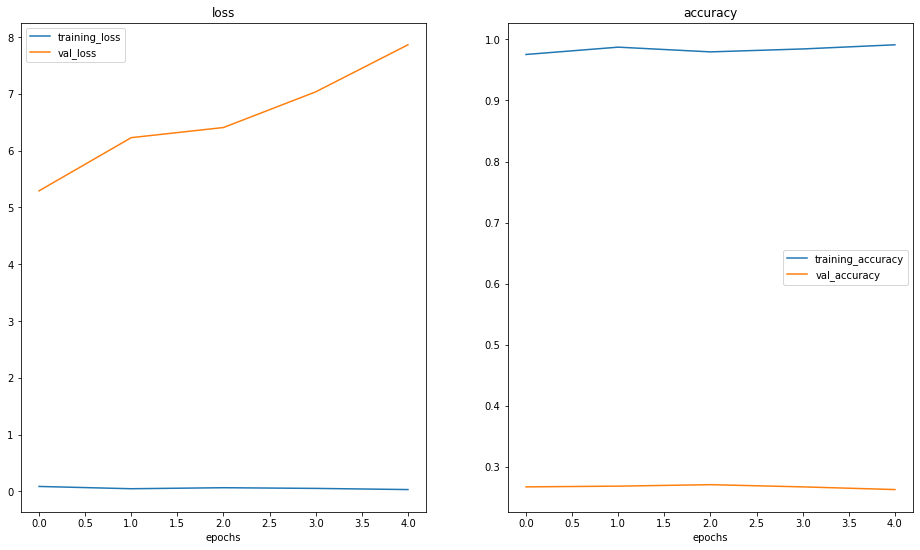

In [ ]:
plot_loss_curves(history)

Try data augmentation:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             shear_range = 0.2, 
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.3, 
                                             horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255.)


#load in our image from directories and turn them into batches
train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                   target_size = (224,224),
                                                                   class_mode = 'categorical',
                                                                   batch_size = 32)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode = 'categorical',
                                             batch_size = 32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
#Create the model

model_12 = Sequential([Conv2D(10,3,input_shape = (224,224,3), activation = 'relu'),
                       Conv2D(10,3, activation = 'relu'),
                       MaxPool2D(),
                       Conv2D(10,3, activation = 'relu'),
                       Conv2D(10,3, activation = 'relu'),
                       MaxPool2D(),
                       Flatten(),
                       Dense(10,activation = 'softmax'),
                       
])

#model_12 = tf.keras.models.clone_model(model_8)
model_12.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = Adam(),
                 metrics = ['accuracy'])

history_12 = model_12.fit(train_data_augmented,
                          epochs = 5,
                          steps_per_epoch = len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 130s 552ms/step - loss: 2.2153 - accuracy: 0.1696 - val_loss: 2.1027 - val_accuracy: 0.2524
Epoch 2/5
235/235 [==============================] - 129s 551ms/step - loss: 2.1138 - accuracy: 0.2471 - val_loss: 1.9266 - val_accuracy: 0.3204
Epoch 3/5
235/235 [==============================] - 129s 551ms/step - loss: 2.0760 - accuracy: 0.2597 - val_loss: 1.9344 - val_accuracy: 0.3292
Epoch 4/5
235/235 [==============================] - 129s 548ms/step - loss: 2.0097 - accuracy: 0.2944 - val_loss: 1.7968 - val_accuracy: 0.3892
Epoch 5/5
235/235 [==============================] - 129s 547ms/step - loss: 1.9429 - accuracy: 0.3213 - val_loss: 1.7799 - val_accuracy: 0.3836


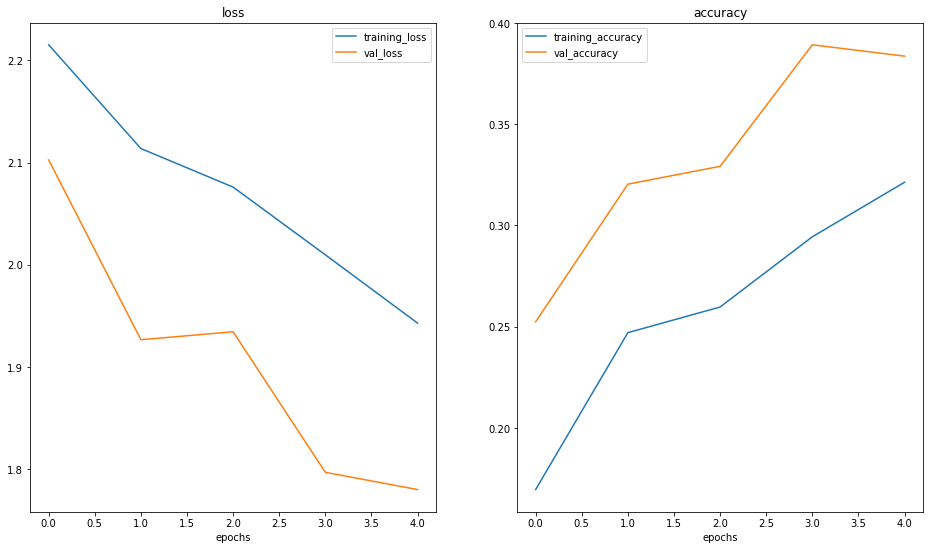

In [ ]:
plot_loss_curves(history_12)

That looks much better, the loss curve are much closer to each other than the baseline model and they look like they're heading in the right direction, so if we train for longer , we may see further improvement


Future work

-restructuring architecture

-change learning rate

-try other data augmentation

-get more data

-train for longer

-try transfer learning


In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
sushi= mpimg.imread('03-sushi.jpeg')
sushi

--2022-01-11 10:32:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg.1’

03-sushi.jpeg.1     100%[===================>]   1.64M  --.-KB/s    in 0.06s   

2022-01-11 10:32:30 (28.1 MB/s) - ‘03-sushi.jpeg.1’ saved [1725178/1725178]



array([[[ 46,  38,  17],
        [ 46,  38,  17],
        [ 46,  38,  17],
        ...,
        [219, 186, 143],
        [219, 186, 143],
        [222, 189, 146]],

       [[ 48,  40,  19],
        [ 48,  40,  19],
        [ 48,  40,  21],
        ...,
        [221, 188, 145],
        [220, 187, 144],
        [221, 188, 145]],

       [[ 48,  41,  22],
        [ 48,  41,  22],
        [ 47,  40,  21],
        ...,
        [222, 189, 146],
        [220, 187, 144],
        [220, 187, 144]],

       ...,

       [[ 82,  47,  17],
        [ 83,  48,  18],
        [ 79,  44,  14],
        ...,
        [249, 217, 158],
        [250, 218, 159],
        [248, 216, 157]],

       [[ 82,  47,  17],
        [ 82,  47,  17],
        [ 78,  43,  13],
        ...,
        [246, 214, 155],
        [246, 216, 156],
        [244, 214, 154]],

       [[ 83,  48,  18],
        [ 83,  48,  18],
        [ 78,  43,  13],
        ...,
        [247, 216, 159],
        [249, 218, 161],
        [248, 217, 160]]

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
hamburger = mpimg.imread('03-hamburger.jpeg')
hamburger

--2022-01-11 10:34:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.07s   

2022-01-11 10:34:08 (48.5 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]



array([[[  2,   0,  11],
        [  2,   0,  11],
        [  2,   0,  11],
        ...,
        [151, 172, 199],
        [146, 167, 194],
        [147, 168, 195]],

       [[  1,   0,   8],
        [  1,   0,   8],
        [  2,   1,   9],
        ...,
        [150, 171, 198],
        [145, 166, 193],
        [145, 166, 193]],

       [[  1,   0,   6],
        [  1,   0,   6],
        [  1,   0,   6],
        ...,
        [144, 168, 194],
        [144, 168, 194],
        [146, 170, 196]],

       ...,

       [[ 91,  68,  36],
        [ 93,  73,  40],
        [ 96,  76,  43],
        ...,
        [ 62,  35,   6],
        [ 65,  38,   9],
        [ 67,  40,  13]],

       [[ 91,  68,  36],
        [ 92,  72,  39],
        [ 95,  75,  42],
        ...,
        [ 63,  36,   7],
        [ 65,  38,  11],
        [ 68,  41,  14]],

       [[ 88,  65,  33],
        [ 88,  68,  35],
        [ 89,  69,  36],
        ...,
        [ 67,  40,  11],
        [ 67,  40,  13],
        [ 67,  40,  13]]

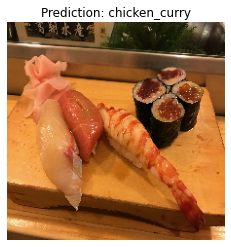

In [ ]:
pred_and_plot(model = model_12,
              filename = '03-sushi.jpeg',
              class_names = class_names)

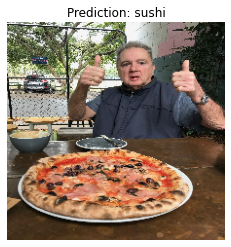

In [ ]:
pred_and_plot(model = model_12,
              filename = '03-pizza-dad.jpeg',
              class_names = class_names)

In [ ]:
## Saving and loading our model

model_12.save('saved_trained_model_12')

INFO:tensorflow:Assets written to: saved_trained_model_12/assets


In [ ]:
#load in a trained model and evaluate it

loaded_model_12 = tf.keras.models.load_model('saved_trained_model_12')

In [ ]:
model_12.evaluate(test_data)

79/79 [==============================] - 13s 157ms/step - loss: 1.7799 - accuracy: 0.3836


[1.779935359954834, 0.38359999656677246]

In [ ]:
loaded_model_12.evaluate(test_data)

79/79 [==============================] - 13s 156ms/step - loss: 1.7799 - accuracy: 0.3836


[1.7799360752105713, 0.38359999656677246]